In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [28]:
# N = 100
# lim = 4
N_samples = 2**10 + 1

def gauss2d(x,y,mus,sigmas):
    xy = (np.vstack((x,y,)).T).reshape(-1,2,1)
    mus = mus.T.reshape(1,2,-1)
    sigmas = sigmas.reshape(1,-1)

    z_sqrd = (((xy - mus)/sigmas)**2).sum(1)
    return np.exp(-0.5*z_sqrd)/(2*np.pi*sigmas**2)

def binc(x):
    return 0.5*(x[1:] + x[:-1])

# xy_sigma = np.random.uniform(0.5,1,N)
# xy_reco = np.random.uniform(-lim,lim,(N,2))

x = binc(np.linspace(-2*lim,2*lim,N_samples + 1))
y = x.copy()

X, Y = np.meshgrid(x,y)

<IPython.core.display.Javascript object>


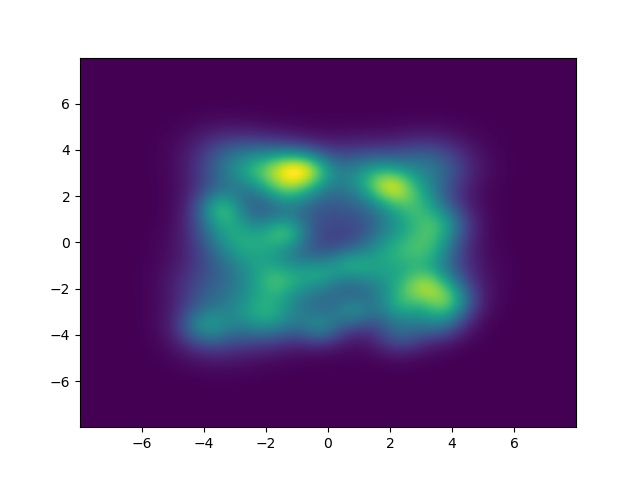

In [31]:
fig, ax = plt.subplots()
H = gauss2d(X.flatten(),Y.flatten(),xy_reco,xy_sigma).sum(1).reshape(N_samples,N_samples)
ax.pcolormesh(X,Y,H)

In [87]:
def scan(mus,sigmas):
    
    P_i = gauss2d(X.flatten(),Y.flatten(),xy_reco,xy_sigma).reshape(-1,1,N)
    P = (1-gauss2d(X.flatten(),Y.flatten(),mus,sigmas)).reshape(-1,mus.shape[0],1)*P_i
    P = P.reshape(N_samples,N_samples,mus.shape[0],N)
    P = -np.log(romb(romb(P,dy,0),dx,0)).sum(1)
    return P

In [103]:
P_i = gauss2d(X.flatten(),Y.flatten(),xy_reco,xy_sigma)

In [112]:
N_scan = 10
x_scan = np.linspace(-2,2,N_scan+1)
y_scan = np.linspace(-2,2,N_scan+1)

X_scan_grid, Y_scan_grid = np.meshgrid(x_scan,y_scan)
X_scan, Y_scan = np.meshgrid(binc(x_scan),binc(y_scan))

mus = np.vstack([X_scan.flatten(),Y_scan.flatten()]).T
sigmas = np.ones(N_scan**2)
# P = scan(mus,sigmas)
P = np.zeros((N_scan,N_scan))

def LossFunc(mu_x,mu_y,sigma):
    P = (1-gauss2d(X.flatten(),Y.flatten(),np.asarray([mu_x,mu_y]),np.asarray(sigma)))*P_i
    return -np.log(romb(romb(P.reshape(N_samples,N_samples,-1),dy,0),dx,0)).sum(0)

for i, mu_x in enumerate(binc(x_scan)):
    for j, mu_y in enumerate(binc(y_scan)):
        P[j,i] = LossFunc(mu_x,mu_y,1)


<IPython.core.display.Javascript object>


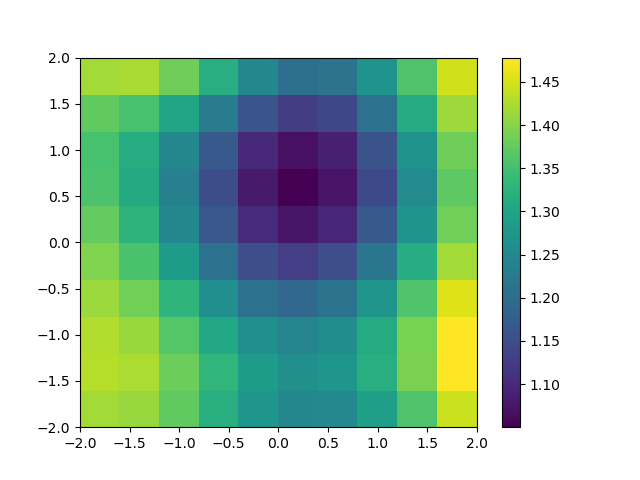

In [114]:
fig, ax = plt.subplots()
im = ax.pcolormesh(X_scan_grid,Y_scan_grid,P.reshape(N_scan,N_scan))
fig.colorbar(im)

In [116]:
from iminuit import Minuit
from iminuit.util import make_func_code
from iminuit import describe

class integratedLH:
    def __init__(self, f):
        self.f = f
        
        self.func_code = make_func_code(describe(self.f))
    
    def __call__(self, *par):
        return self.f(*par)
    
    def default_errordef(self):
        return 0.5

In [117]:
obj = integratedLH(LossFunc)
M = Minuit(obj,mu_x=1,mu_y=1,sigma=1, limit_mu_x=(-lim,lim),limit_mu_y=(-lim,lim),limit_sigma=(0,None))
M.migrad()

------------------------------------------------------------------
| FCN = 2.107e-05               |     Ncalls=108 (108 total)     |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     True      |     True      |   False   |   False   | False  |
------------------------------------------------------------------
-------------------------------------------------------------------------------------------
|   | Name  |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
-------------------------------------------------------------------------------------------
| 0 | mu_x  | 2.9573e-1 | 0.0000e-1 |            |            |   -4    |    4    |       |
| 1 | mu_y  | 3.0674e-1 | 0.0000e-1 |            |            |   -4    |    4    |       |
| 2 | sigma | 9.3413e-5 | 0.0000e-5 |            |            |    0    |         |       |
-------------------------------------------------------------------------------------------

In [57]:
P = (1-gauss2d(X.flatten(),Y.flatten(),np.array([0,1]),np.array(1)))*gauss2d(X.flatten(),Y.flatten(),xy_reco,xy_sigma)
P = P.reshape(N_samples,N_samples,-1)
P.shape

(1025, 1025, 100)

In [60]:
romb(romb(P,dy,0),dx,0)

array([0.98547343, 0.98531097, 0.99170049, 0.99389313, 0.9985568 ,
       0.99958761, 0.99973683, 0.99999954, 0.99439955, 0.9824657 ,
       0.97688074, 0.94486984, 0.9996998 , 0.99993112, 0.99996734,
       0.99999753, 0.99954324, 0.98241682, 0.99400187, 0.99986102,
       0.99996732, 0.96802903, 0.99159068, 0.99982256, 0.99953754,
       0.9801079 , 0.97658019, 0.98589238, 0.9971292 , 0.9998416 ,
       0.99587435, 0.98513275, 0.99667538, 0.98905941, 0.9920118 ,
       0.98740337, 0.99999907, 0.97375919, 0.99903953, 0.9991337 ,
       0.99902721, 0.98675838, 0.99941846, 0.98703845, 0.99758992,
       0.9978906 , 0.94522603, 0.98048548, 0.98699358, 0.99522903,
       0.99872125, 0.99813371, 0.9999389 , 0.99347263, 0.95008076,
       0.9999999 , 0.99997811, 0.99684084, 0.99589413, 0.99907858,
       0.94101034, 0.99911397, 0.98797563, 0.99962444, 0.99721638,
       0.99991408, 0.99994578, 0.99183816, 0.99992983, 0.99420147,
       0.99774166, 0.9736988 , 0.99971017, 0.99897606, 0.99976

In [46]:
from scipy.integrate import simps, romb, quad_vec
dx = (x[1:] - x[:-1]).mean()
dy = (y[1:] - y[:-1]).mean()
romb(romb(H,dx),dy)

99.99997893226586

In [54]:
simps(simps(H,x),y)

99.99997893226225

In [50]:
quad_vec(lambda y: quad_vec(lambda x: (gauss2d(x,y,xy_reco,xy_sigma)),-2*lim,2*lim)[0],-2*lim,2*lim)[0].sum()

99.99997974665386